In [1]:
import numpy as np
print("numpy version - {}".format(np.__version__))
import pandas as pd
print("pandas version - {}".format(pd.__version__))
import matplotlib
print("matplotlib version - {}".format(matplotlib.__version__))
import matplotlib.pyplot as plt
import seaborn as sns
print("seaborn version - {}".format(sns.__version__))
import tensorflow as tf
print("tensorflow version - {}".format(tf.__version__))
import sklearn
print("sklearn version - {}".format(sklearn.__version__))
%matplotlib inline

numpy version - 1.17.2
pandas version - 0.25.1
matplotlib version - 3.1.1
seaborn version - 0.9.0
tensorflow version - 2.0.0
sklearn version - 0.21.3


In [2]:
data_path = '/home/vlad/.data/house_price'

In [3]:
!ls /home/vlad/.data/house_price

data_description.txt				 test.csv
house-prices-advanced-regression-techniques.zip  train.csv
sample_submission.csv


In [4]:
train = pd.read_csv(data_path + '/train.csv')
test = pd.read_csv(data_path + '/test.csv')

In [5]:
print("train data shape {}".format(train.shape))
train.info()

train data shape (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object

In [6]:
print("test data shape {}".format(test.shape))
test.info()

test data shape (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

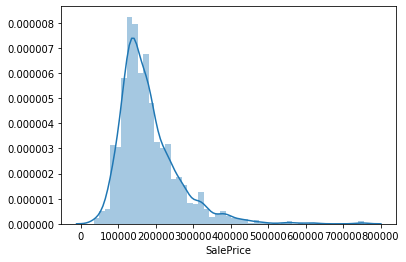

In [9]:
sns.distplot(train.SalePrice);

In [10]:
print("Skewness: {}\nKurtosis: {}".format(train.SalePrice.skew(), train.SalePrice.kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [11]:
train.SalePrice = np.log(train.SalePrice)

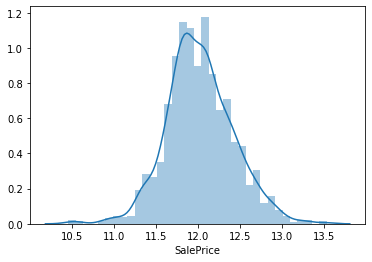

In [12]:
sns.distplot(train.SalePrice);

In [13]:
print("Skewness: {}\nKurtosis: {}".format(train.SalePrice.skew(), train.SalePrice.kurt()))

Skewness: 0.12133506220520406
Kurtosis: 0.8095319958036296


In [14]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [15]:
def percent_value_count(df, feature):
    percent = pd.DataFrame(round(df.loc[:, feature].value_counts(dropna=False, normalize=True) * 100, 2))
    total = pd.DataFrame(df.loc[:, feature].value_counts())
    
    percent.columns=['percent']
    total.columns=['Total']
    return pd.concat([total, percent], axis=1)

In [16]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

In [17]:
def scaling(df):
    for feature in df.columns:
        if feature != 'Id' and feature != 'SalePrice':
            df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())

In [18]:
mis_per_train = missing_percentage(train)
mis_per_train[mis_per_train['Total'] != 0]

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [19]:
mis_per_test = missing_percentage(test)
mis_per_test[mis_per_test['Total'] != 0]

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


In [20]:
list(mis_per_train[mis_per_train['Percent'] > 10].index), list(mis_per_test[mis_per_test['Percent'] > 10].index) 

(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'],
 ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'])

In [21]:
train.drop(columns=list(mis_per_train[mis_per_train['Percent'] > 10].index), axis=1, inplace=True)

In [22]:
test.drop(columns=list(mis_per_train[mis_per_train['Percent'] > 10].index), axis=1, inplace=True)

In [23]:
mis_per_train = missing_percentage(train); mis_per_test = missing_percentage(test)

In [24]:
list(mis_per_train[mis_per_train['Percent'] > 10].index), list(mis_per_test[mis_per_test['Percent'] > 10].index) 

([], [])

In [25]:
for data_set in [train, test]:
    object_values = data_set.select_dtypes(object)
    for i in range(len(object_values.columns)):
        current_feature = object_values.columns[i]
        df = percent_value_count(object_values, current_feature)
        numerical_interpretation = range(1, len(df.index) + 1)
        set_ = {}
        zip_list = zip(df.index, numerical_interpretation)
        for pair in zip_list:
            set_[pair[0]] = pair[1]
        data_set[current_feature] = data_set[current_feature].map(
            set_
        ).astype(int)
        

/home/vlad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [26]:
for data_set in [train, test]:
    for feature in data_set.columns[data_set.isnull().any()].tolist():
        data_set[feature].fillna(data_set[feature].median(), inplace=True)

In [27]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotArea            int64
Street             int64
                  ...   
MoSold             int64
YrSold             int64
SaleType           int64
SaleCondition      int64
SalePrice        float64
Length: 75, dtype: object

In [28]:
test.dtypes

Id               int64
MSSubClass       int64
MSZoning         int64
LotArea          int64
Street           int64
                 ...  
MiscVal          int64
MoSold           int64
YrSold           int64
SaleType         int64
SaleCondition    int64
Length: 74, dtype: object

In [29]:
scaling(train)
scaling(test)

In [30]:
train.describe()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,0.217043,0.074658,0.043080,0.004110,0.136073,0.061872,0.000685,0.104110,0.031164,...,0.039772,0.006712,0.031377,0.003738,0.002806,0.483811,0.453938,0.029195,0.062329,12.024051
std,421.610009,0.248827,0.167097,0.046653,0.063996,0.194099,0.202170,0.026171,0.193362,0.138116,...,0.110723,0.057711,0.116161,0.054441,0.032008,0.245784,0.332024,0.099226,0.153479,0.399452
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460242
25%,365.750000,0.000000,0.000000,0.029229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000,0.000000,0.000000,11.775097
50%,730.500000,0.176471,0.000000,0.038227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000,0.000000,0.000000,12.001505
75%,1095.250000,0.294118,0.000000,0.048150,0.000000,0.333333,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000,0.000000,0.000000,12.273731
max,1460.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.534473


In [31]:
test.describe()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,0.219873,0.606443,0.151445,0.004112,0.130683,0.057117,0.001371,0.096984,0.022618,...,0.065113,0.023956,0.004984,0.029626,0.002180,0.003422,0.464016,0.442426,0.830021,0.063605
std,421.321334,0.251452,0.138331,0.089888,0.064018,0.185955,0.187061,0.037012,0.191828,0.108783,...,0.092835,0.066431,0.056133,0.098281,0.038115,0.037106,0.247494,0.325435,0.181618,0.161817
min,1461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1825.500000,0.000000,0.600000,0.107401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272727,0.250000,0.888889,0.000000
50%,2190.000000,0.176471,0.600000,0.143824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.037736,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000,0.888889,0.000000
75%,2554.500000,0.294118,0.600000,0.182251,0.000000,0.333333,0.000000,0.000000,0.250000,0.000000,...,0.097035,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000,0.888889,0.000000
max,2919.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
target = 'SalePrice'

In [33]:
target in train.columns, target in test.columns

(True, False)

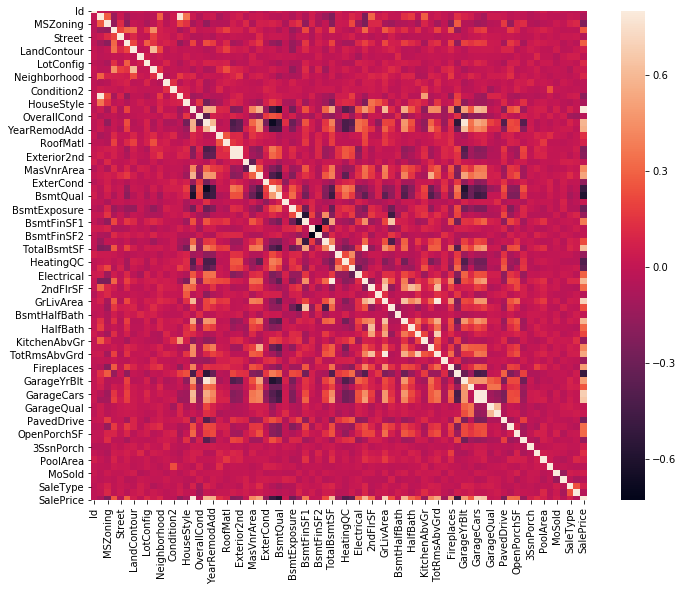

In [34]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

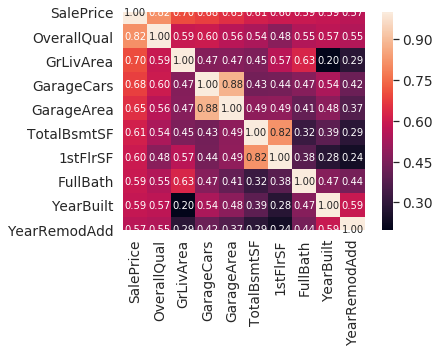

In [35]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, target)[target].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [36]:
sorted(train.corr()[target])[:10]

[-0.5912898555062664,
 -0.5031296864837637,
 -0.49378813711575237,
 -0.4058403599465942,
 -0.35160018359252687,
 -0.30382559257007663,
 -0.26269545939263544,
 -0.23785406702186626,
 -0.2161310748061973,
 -0.19318326657483967]

In [37]:
sorted(train.corr()[target])[-10:]

[0.5656078325911802,
 0.5865702403842271,
 0.5947705420075325,
 0.5969810450343732,
 0.6121339753697862,
 0.6508875559020075,
 0.6806248074360439,
 0.7009266525441297,
 0.8171844179216764,
 1.0]

In [38]:
X = train.drop([target], axis=1)
y = train[target]

In [39]:
X.shape, y.shape, test.shape

((1460, 74), (1460,), (1459, 74))

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.metrics import mean_absolute_error

In [42]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_err = mean_absolute_error(lin_reg_model.predict(X_test), y_test)
print(lin_reg_err)

0.10170482166059384


In [43]:
lin_reg_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [44]:
alphas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
best_lin_regcv_model = None
best_lin_regcv_err = 1

lin_reg_cv_model = RidgeCV(alphas=alphas)
lin_reg_cv_model.fit(X_train, y_train)
lin_regcv_err = mean_absolute_error(lin_reg_cv_model.predict(X_test), y_test)
print(lin_regcv_err)

0.10099963421478277


In [45]:
lin_reg_cv_model.get_params()

{'alphas': array([0.001, 0.003, 0.01 , 0.03 , 0.1  , 0.3  ]),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': False,
 'scoring': None,
 'store_cv_values': False}

In [46]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [47]:
predictions = lin_reg_cv_model.predict(test)

In [48]:
final_predictions = np.exp(predictions)

In [49]:
submission[target] = final_predictions
submission.head()

,Id,SalePrice
0,1461,102625.471881
1,1462,126027.907030
2,1463,144864.840965
3,1464,157836.142031
4,1465,160620.135521


In [50]:
submission.to_csv('submission1.csv', index=False)